In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute  import SimpleImputer
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
 data = pd.read_csv('Titanic-Dataset.csv')

In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

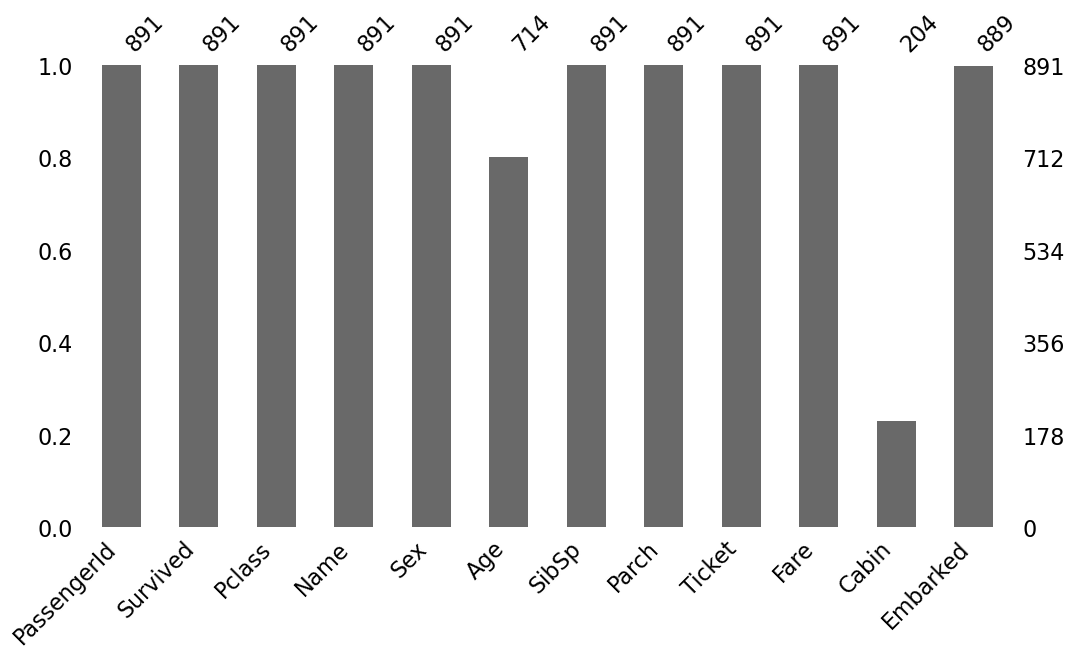

In [9]:
msno.bar(data, figsize = (12,6))

<Axes: >

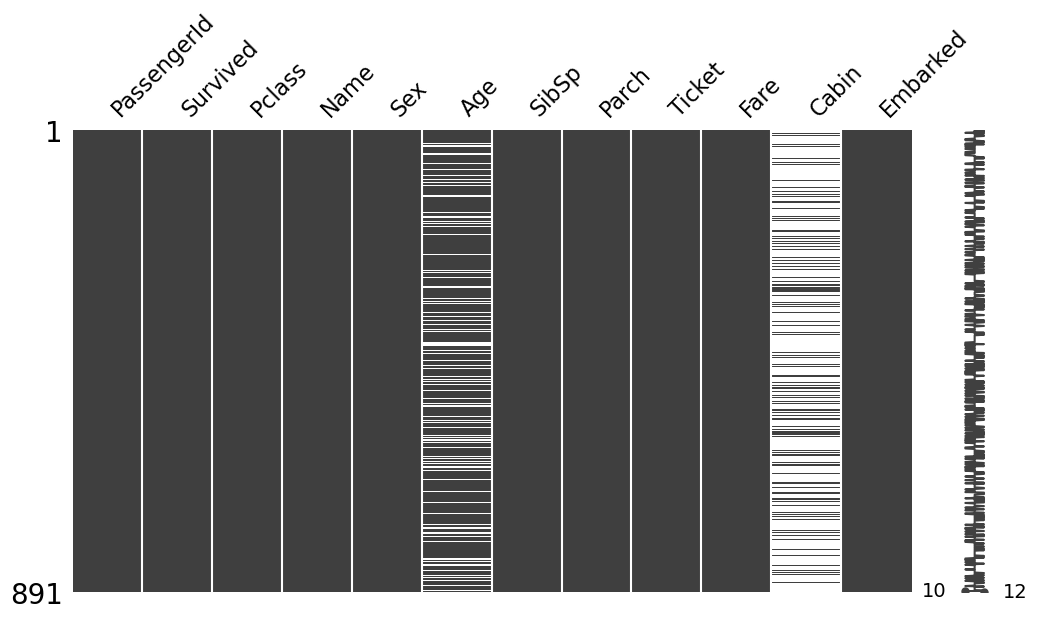

In [10]:
msno.matrix(data, figsize = (12,6))

<Axes: >

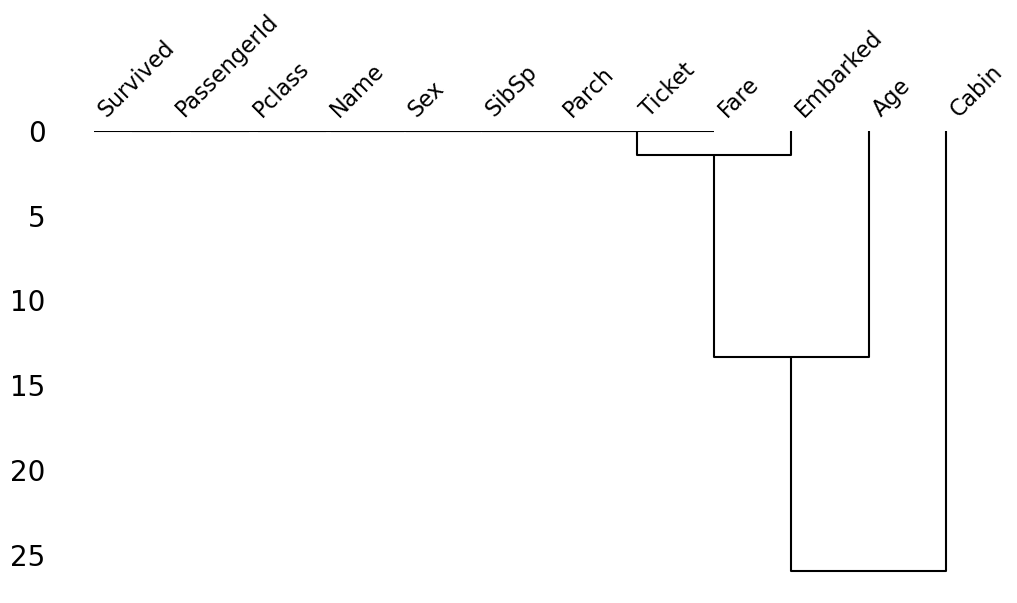

In [11]:
msno.dendrogram(data, figsize = (12,6))

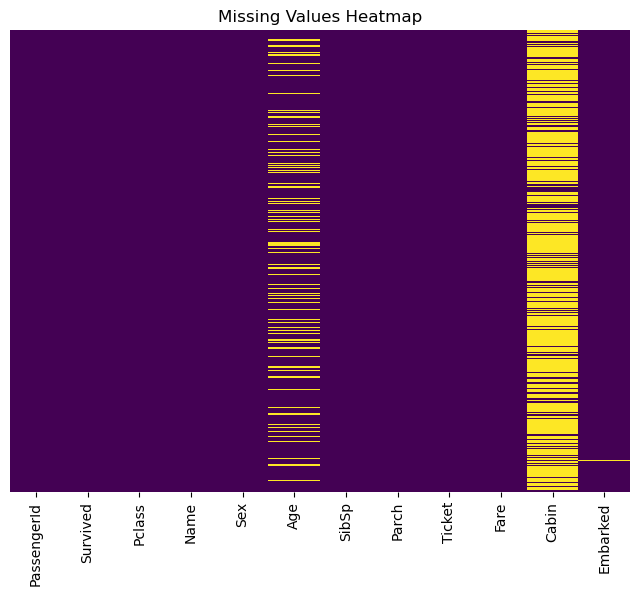

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

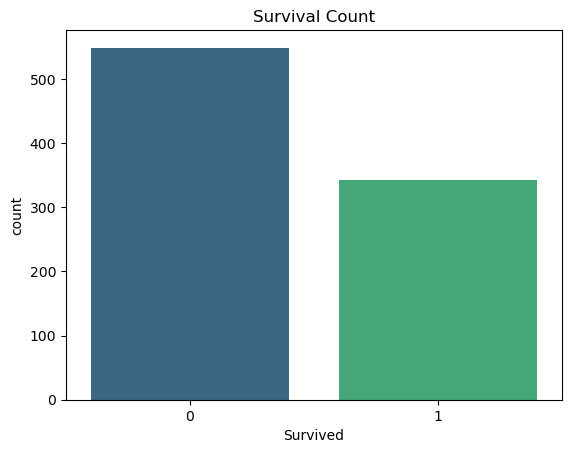

In [13]:
sns.countplot(x='Survived', data=data, palette='viridis')
plt.title('Survival Count')
plt.show()

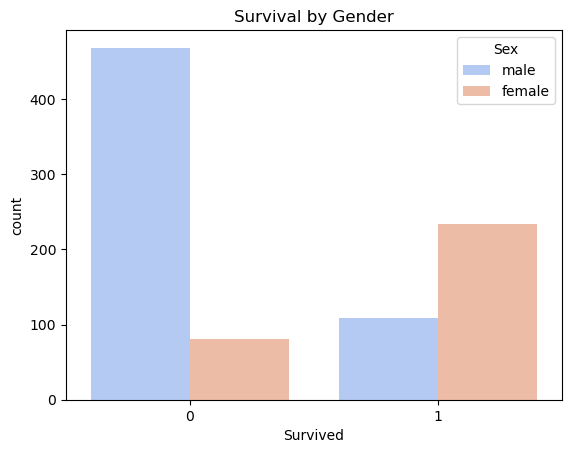

In [14]:
sns.countplot(x='Survived', hue='Sex', data=data, palette='coolwarm')
plt.title('Survival by Gender')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


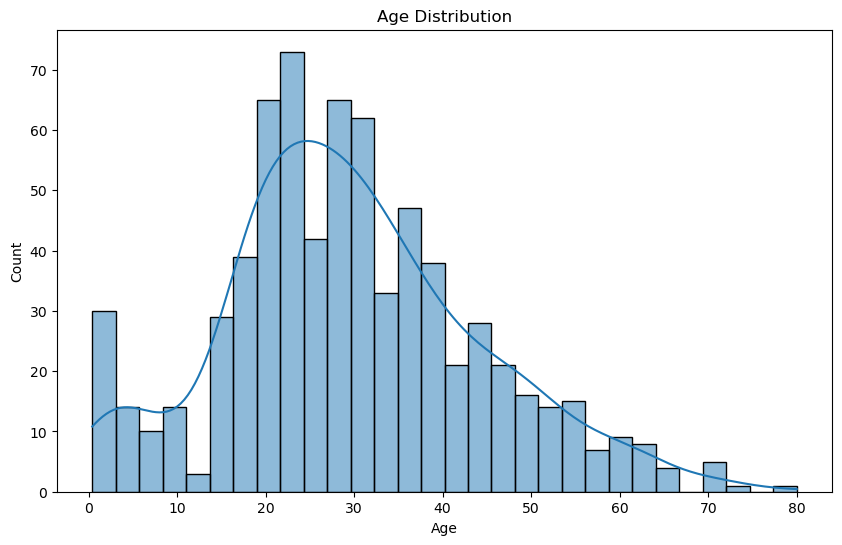

In [15]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


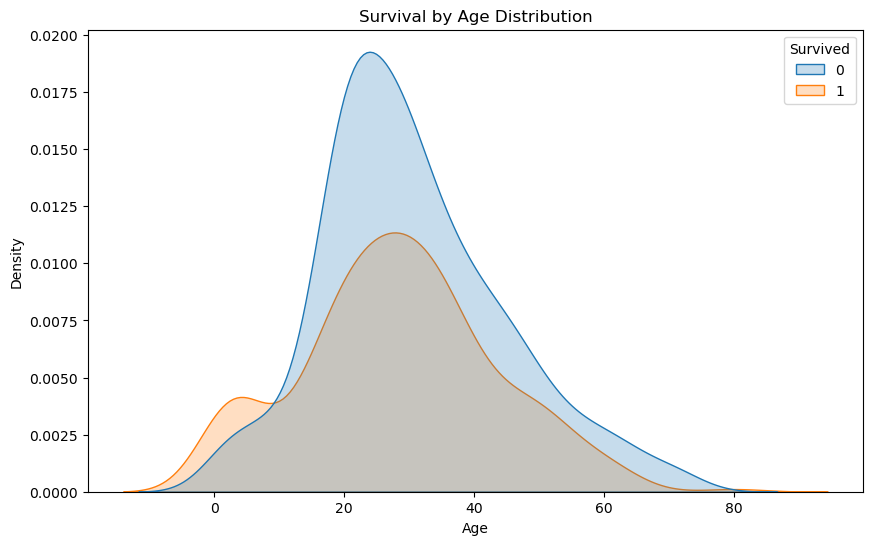

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Age', hue='Survived', fill=True)
plt.title('Survival by Age Distribution')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


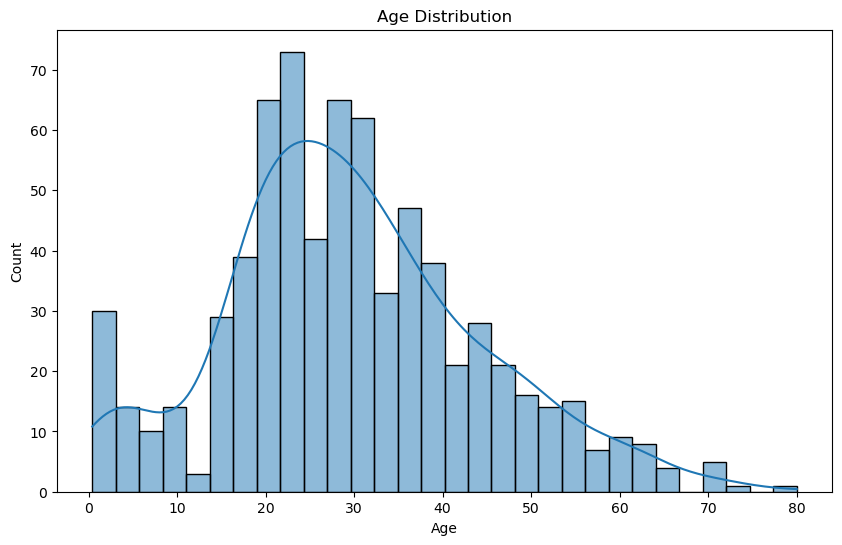

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


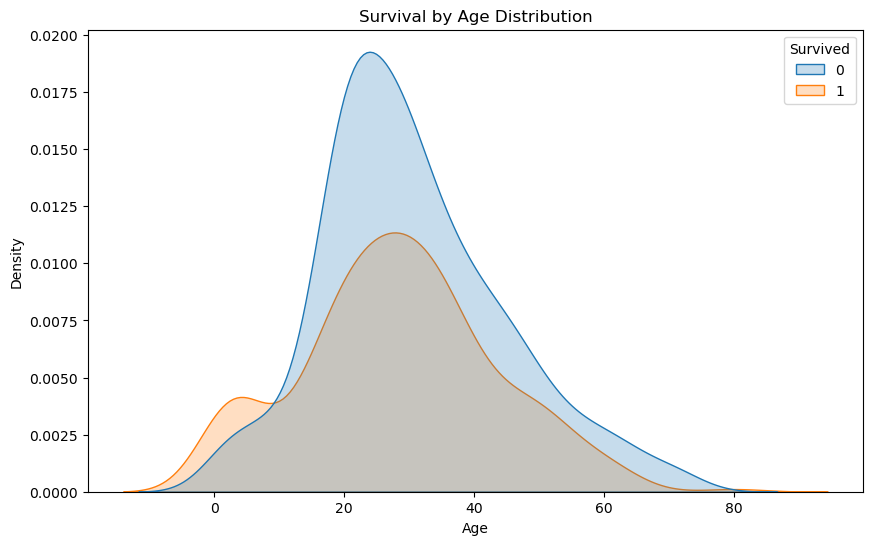

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(data=data, x='Age', hue='Survived', fill=True)
plt.title('Survival by Age Distribution')
plt.show()

In [18]:
data['Pclass'] = data['Pclass'].astype(str)
data['Survived'] = data['Survived'].astype(str)

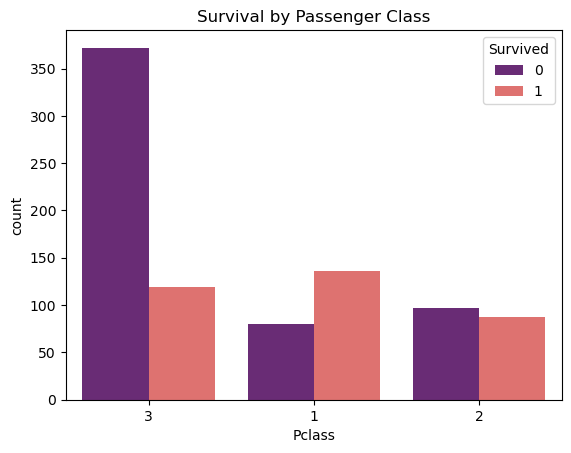

In [19]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='magma')
plt.title('Survival by Passenger Class')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


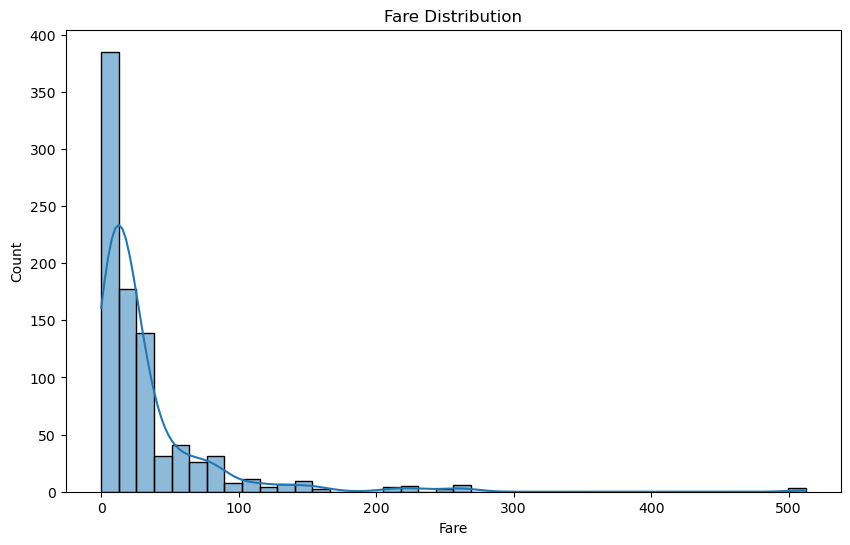

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(data['Fare'], kde=True, bins=40)
plt.title('Fare Distribution')
plt.show()

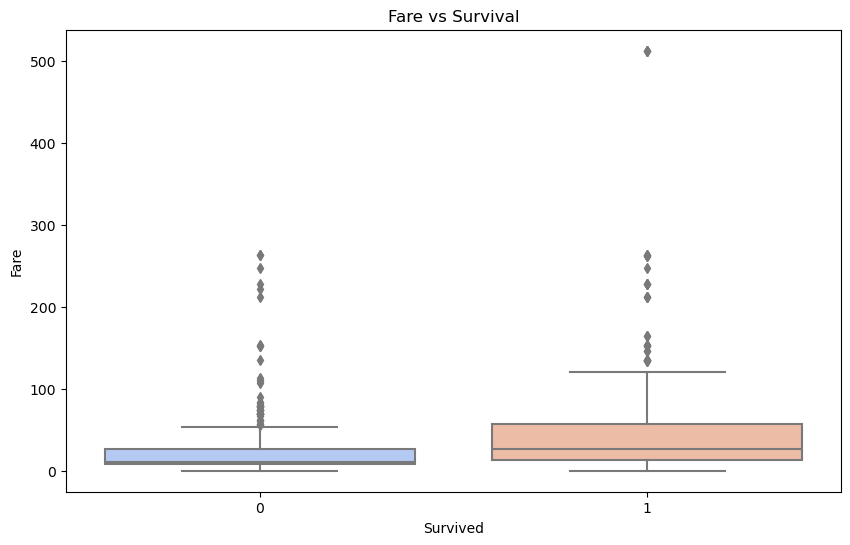

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Survived', y='Fare', data=data, palette='coolwarm')
plt.title('Fare vs Survival')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


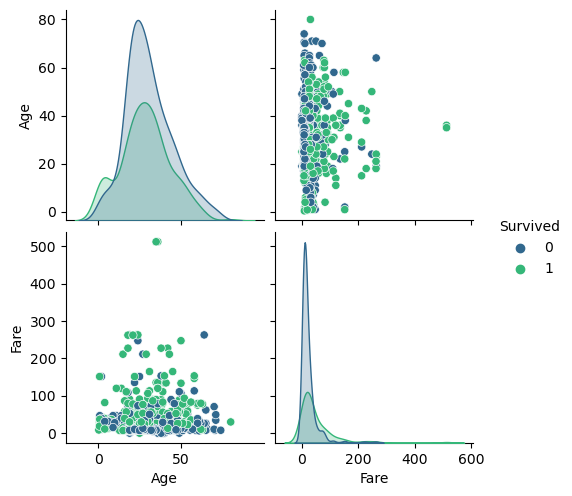

In [22]:
sns.pairplot(data[['Age', 'Fare', 'Pclass', 'Survived']], hue='Survived', palette='viridis')
plt.show()

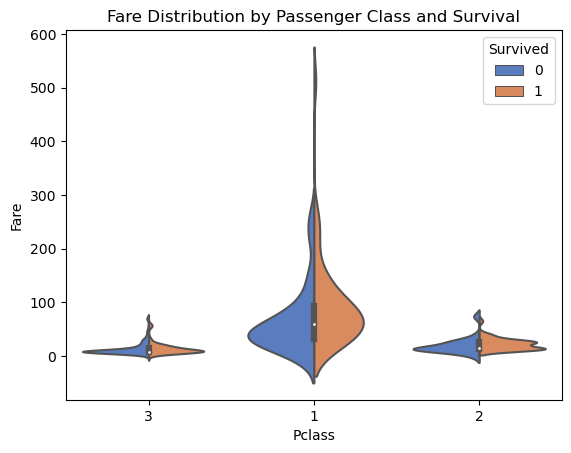

In [23]:
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=data, split=True, palette='muted')
plt.title('Fare Distribution by Passenger Class and Survival')
plt.show()

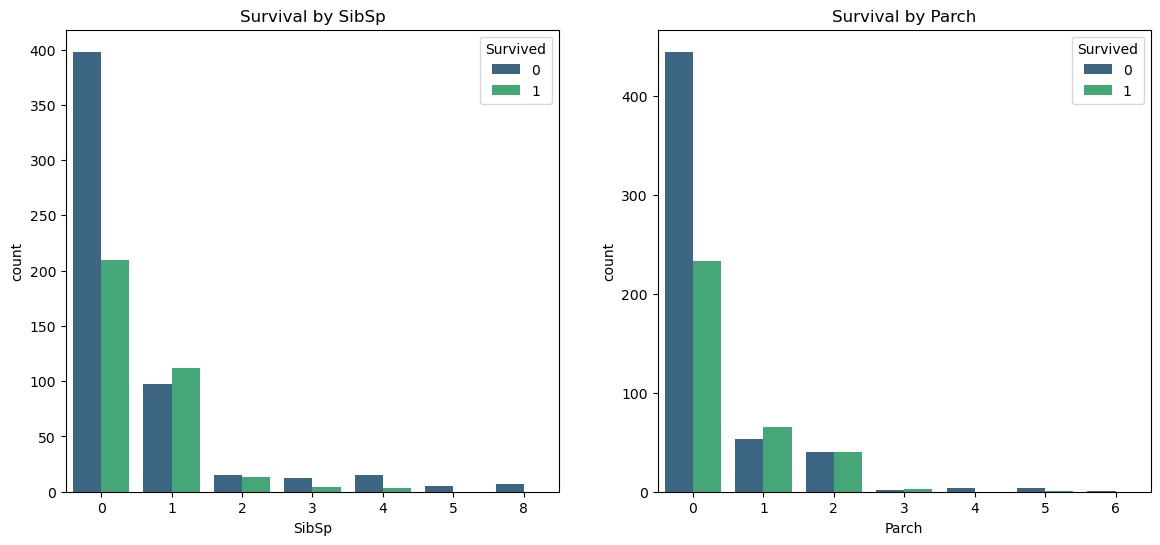

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.countplot(x='SibSp', hue='Survived', data=data, palette='viridis', ax=ax[0])
ax[0].set_title('Survival by SibSp')
sns.countplot(x='Parch', hue='Survived', data=data, palette='viridis', ax=ax[1])
ax[1].set_title('Survival by Parch')
plt.show()

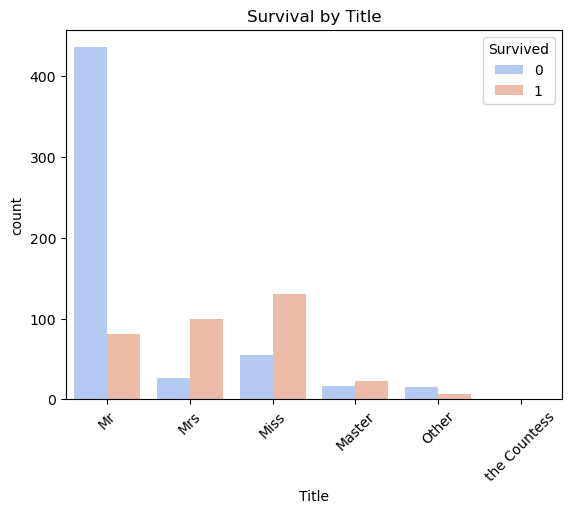

In [25]:
data['Title'] = data['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
                                    'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
sns.countplot(x='Title', hue='Survived', data=data, palette='coolwarm')
plt.title('Survival by Title')
plt.xticks(rotation=45)
plt.show()

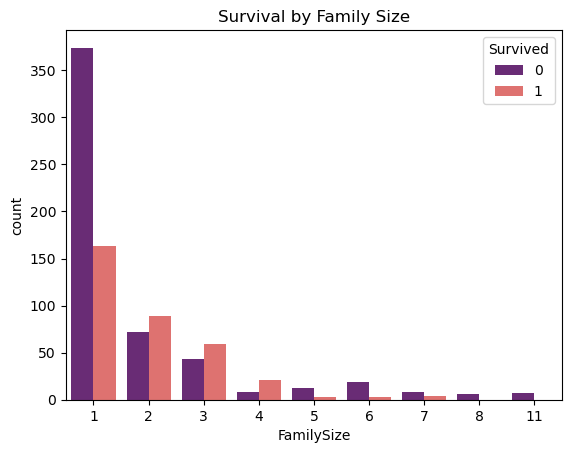

In [26]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
sns.countplot(x='FamilySize', hue='Survived', data=data, palette='magma')
plt.title('Survival by Family Size')
plt.show()

In [27]:
data=data.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)

In [28]:
imp=SimpleImputer(strategy='mean')
data['Age']=imp.fit_transform(data[['Age']])

In [29]:
LabelEncoder_= LabelEncoder()
data['Sex']=LabelEncoder_.fit_transform(data['Sex'])
data['Embarked']=LabelEncoder_.fit_transform(data['Embarked'])

In [30]:
imp_cat=SimpleImputer(strategy='most_frequent')
data['Embarked']=imp_cat.fit_transform(data[['Embarked']])

In [31]:
X=data.drop(['Survived'],axis=1)
Y=data['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [34]:
print(X_train.info())
print(X_train.head())

<class 'pandas.core.frame.DataFrame'>
Index: 596 entries, 6 to 102
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      596 non-null    object 
 1   Sex         596 non-null    int64  
 2   Age         596 non-null    float64
 3   SibSp       596 non-null    int64  
 4   Parch       596 non-null    int64  
 5   Fare        596 non-null    float64
 6   Embarked    596 non-null    int64  
 7   Title       596 non-null    object 
 8   FamilySize  596 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 46.6+ KB
None
    Pclass  Sex        Age  SibSp  Parch     Fare  Embarked Title  FamilySize
6        1    1  54.000000      0      0  51.8625         2    Mr           1
718      3    1  29.699118      0      0  15.5000         1    Mr           1
685      2    1  25.000000      1      2  41.5792         0    Mr           4
73       3    1  26.000000      1      0  14.4542         0    Mr     

In [36]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_test['Sex'] = le.transform(X_test['Sex'])

In [39]:
print(y_train.unique())

['0' '1']


In [40]:
y_train = y_train.map({'Survived': 1, 'Not Survived': 0})
y_test = y_test.map({'Survived': 1, 'Not Survived': 0})

In [41]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

ValueError: could not convert string to float: 'Mr'

In [ ]:
logreg.score(X_train,y_train)

In [ ]:
ypred=logreg.predict(X_test)

In [ ]:
classification_Report=classification_report(y_true=y_test,y_pred=ypred)
confusion_matrix_=confusion_matrix(y_true=y_test,y_pred=ypred)

In [ ]:
print(confusion_matrix_)
print(classification_Report)